In [1]:
import time
import numpy as np

from sklearn.model_selection import train_test_split
from decision_Tree import DecisionTree

# Splitting data in train and validation

In [11]:
data = np.load('../Data/fashion_train.npy')
X = data[:,:-1]
y = data[:,-1]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

labels = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Shirt']

data = X > 15
np.random.seed(0)
X_train, X_val, y_train, y_val = train_test_split(data, y, test_size=0.2, random_state=42)


clf = DecisionTree(X_train, y_train, debug = False, max_depth=5)
start = time.time()
clf.fit()

print("Time taken: ", time.time() - start)

print("Train score", clf.score(X_train, y_train))
print("Val score", clf.score(X_val, y_val))


X shape:  (10000, 784)
y shape:  (10000,)


Time taken:  5.704027891159058
Train score 0.768125
Val score 0.7345


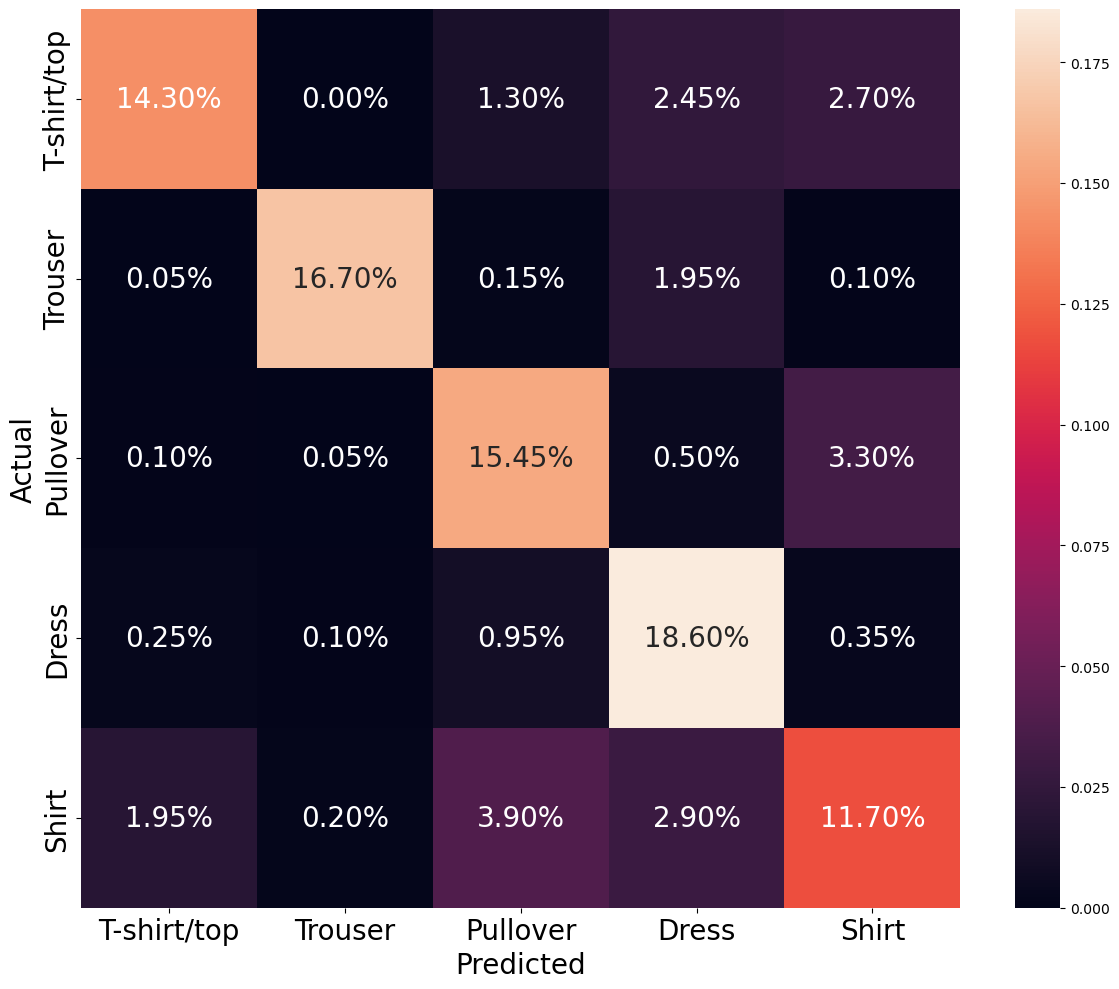

In [3]:
clf.confusion_matrix(X_val, y_val, labels=labels)

# Traning on full training set

In [9]:
data = np.load('../Data/fashion_train.npy')
X = data[:,:-1]
y = data[:,-1]
print("X shape: ", X.shape)
print("y shape: ", y.shape)

data = X > 15

clf_final = DecisionTree(data, y, debug = False, max_depth=5)

start = time.time()
clf_final.fit()
print("Time taken: ", time.time() - start)

print("Train score", clf_final.score(data, y))

X shape:  (10000, 784)
y shape:  (10000,)


Time taken:  6.538852214813232
Train score 0.7657


# Results from test dataset

Test score: 0.7474


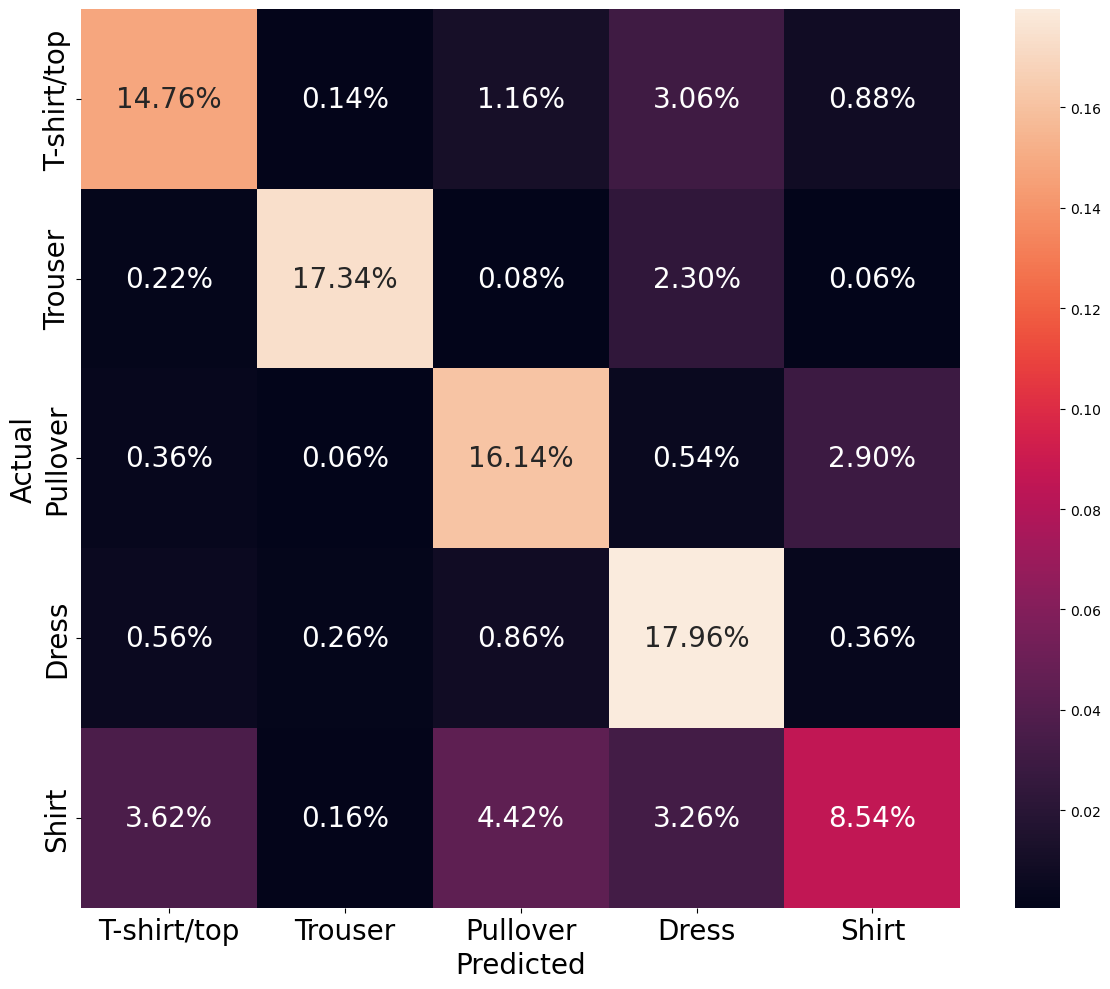

In [10]:
testData = np.load('../Data/fashion_test.npy')
X_test = testData[:,:-1]
y_test = testData[:,-1]

data = X_test > 15
print("Test score:", clf_final.score(data, y_test))
clf_final.confusion_matrix(data, y_test, labels=labels)